In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt

#Testing some toy data

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})

circles.head()


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [2]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

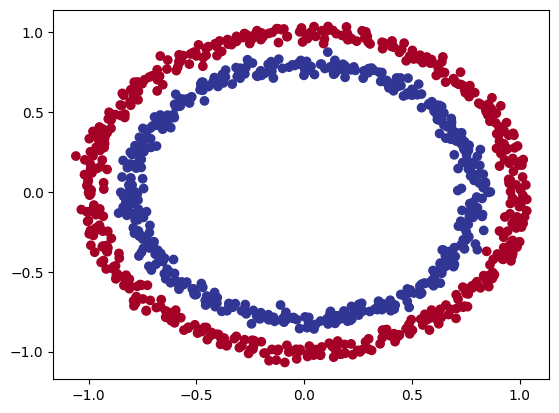

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [4]:
 X.shape, y.shape

((1000, 2), (1000,))

In [5]:
len(X), len(y)

(1000, 1000)

In [6]:
tf.random.set_seed(42)

#Create
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#Compile
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#Fit
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 2s 6ms/step - loss: 3.4127 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7923 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7160 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 10ms/step - loss: 0.7007 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6966 - accuracy: 0.4970


not accurate, 50%, so going to train a little longer

In [7]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

no good

In [8]:
tf.random.set_seed(42)

#Create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

#Fit
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 8ms/step - loss: 1.0646 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7011 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5060
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4930
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4570
Epoch 11/

In [9]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932486295700073, 0.5]

#terrible model!

In [10]:
tf.random.set_seed(42)

#Create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#Fit
model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 2.8717 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8709 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8650 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8637 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8622 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8606 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8570 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.4750
Epoch 11/

bad model, going to check whats going on

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if model.output_shape[-1] > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())






313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


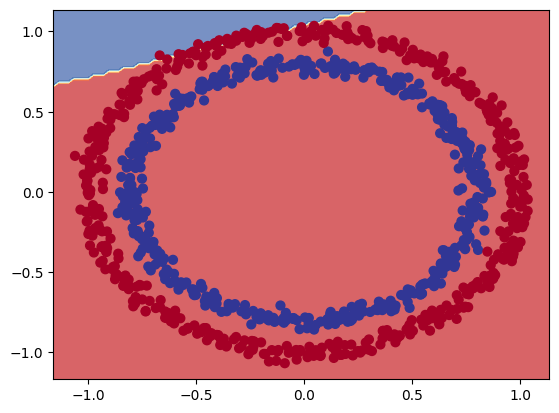

In [12]:
plot_decision_boundary(model_3, X, y)

this model is for regresion problems lets give it a try

In [13]:
tf.random.set_seed(42)

# Create
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

tf.random.set_seed(42)

# Recreate
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
# Fit
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 3s 15ms/step - loss: 486.5730 - mae: 486.5730
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 323.1933 - mae: 323.1933
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 165.3174 - mae: 165.3174
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 54.0309 - mae: 54.0309
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 97.1903 - mae: 97.1903
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 79.6563 - mae: 79.6563
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 44.9087 - mae: 44.9087
Epoch 8/100
5/5 [==============================] - 0s 19ms/step - loss: 52.8513 - mae: 52.8513
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 43.2347 - mae: 43.2347
Epoch 10/100
5/5 [==============================] - 0s 13ms/step - loss: 45.7114 - mae: 45.7114
Epoch 11/100
5/5 [=========================

2/2 [==============================] - 0s 5ms/step


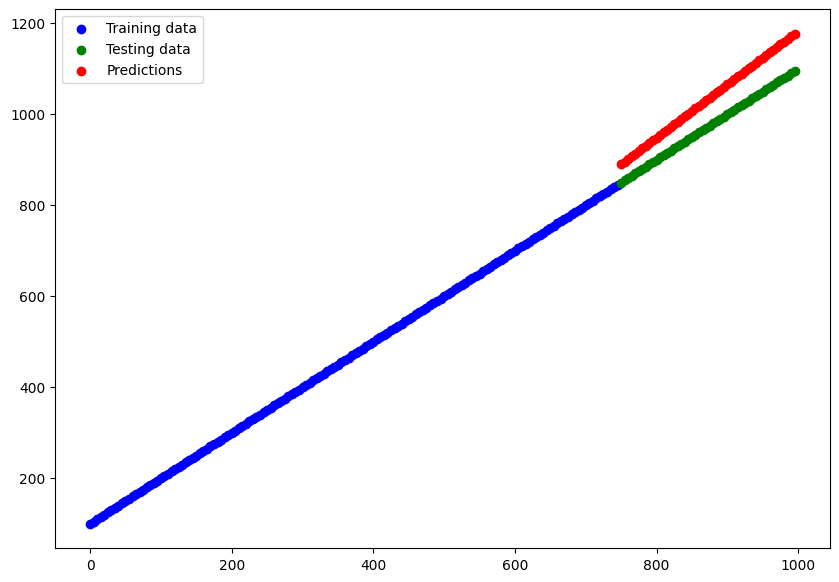

In [14]:
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

#Starting with non linear model

In [33]:
tf.random.set_seed(42)

#Create
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(6, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#Compile
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7667 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7337 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7181 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.4630
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4520
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4410
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4400
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4250
Epoch 11/

In [29]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9990


[0.07310621440410614, 0.9990000128746033]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


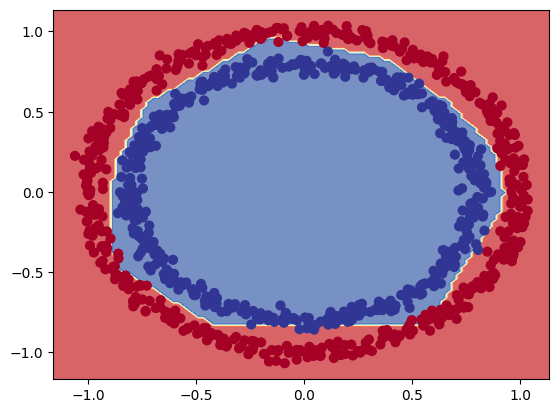

In [32]:
plot_decision_boundary(model_4, X, y)